<h1 style='color:#205be6' align='center'>ESTIMATING HOUSE PRICES USING MULTI PLYAER PERCEPTRON FOR REGRESSION MODELS AND COMPARE THE PERFORMANCE OF THE MODELS.</h1>


Link for the Dataset:https://www.kaggle.com/datasets/shivachandel/kc-house-data

In [1]:
# librires import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
matplotlib.rcParams["figure.figsize"] = (12, 12)


import warnings
warnings.filterwarnings(action='ignore')

<h2 style='color:#00008B'>Load Kc_house_data.csv file</h2>

In [2]:
df1 = pd.read_csv('kc_house_data.csv')

# Print first five rows of the table
df1.head(5) 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<h2 style='color:#205be6'>Data Analyzing and visualizing</h2>

In [3]:
# display the number of rows and columns in the dataset

df1.shape

(21613, 20)

In [4]:
# Display the columns names in the dataset


df1.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### Description of the columns 
* date : Date of the home sale  <br />
* price : Price of each home sold in USD    <br />
* bedrooms : Number of bedrooms in the house   <br />
* bathrooms : Number of bathrooms in the house    <br />
* sqft_living : Square footage of the apartments interior living space    <br />
* sqft_lot : Square footage of the land space   <br />
* floors : Number of floors    <br />  
* waterfront : A dummy variable for whether the apartment was overlooking the waterfront or not <br />
* view : An index from 0 to 4 of how good the view of the property was    <br />
* condition : An index from 1 to 5 on the condition of the apartment    <br />
* grade :An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.   <br />
* sqft_above :The square footage of the interior housing space that is above ground level    <br />
* sqft_basement :  The square footage of the interior housing space that is below ground level   <br />
* yr_built : he year the house was initially built   <br />
* yr_renovated : The year of the house’s last renovation    <br />
* zipcode : What zipcode area the house is in    <br />
* lat : Lattitude    <br />
* long :Longitude    <br />
* sqft_living15 : The square footage of interior housing living space for the nearest 15 neighbors    <br />
* sqft_lot15 : The square footage of the land lots of the nearest 15 neighbors    <br />

In [5]:
# display the data types

df1.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
# display unique values in the each Categorical Column 
print("Column Name   Unique Values")
print("-----------   -------------")
for column in df1.columns:
    if(df1[column].dtypes != df1['floors'].dtypes and df1[column].dtypes != df1['price'].dtypes):
        print(column + ': \t' + str(df1[column].nunique()))

Column Name   Unique Values
-----------   -------------
date: 	372
bedrooms: 	13
sqft_living: 	1038
sqft_lot: 	9782
waterfront: 	2
view: 	5
condition: 	5
grade: 	12
sqft_above: 	946
sqft_basement: 	306
yr_built: 	116
yr_renovated: 	70
zipcode: 	70
sqft_living15: 	777
sqft_lot15: 	8689


In [7]:
# display null values in cloumns 

df1.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df1.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


<AxesSubplot:>

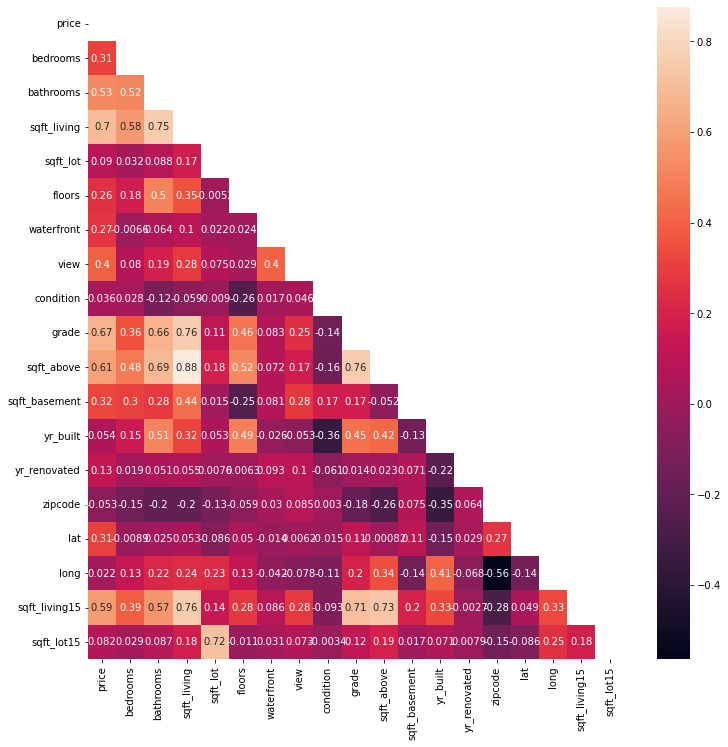

In [9]:
# Plot the Correlation Matrix

matrix = np.triu(df1.corr()) 
sns.heatmap(df1.corr(), annot = True, mask=matrix)

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      

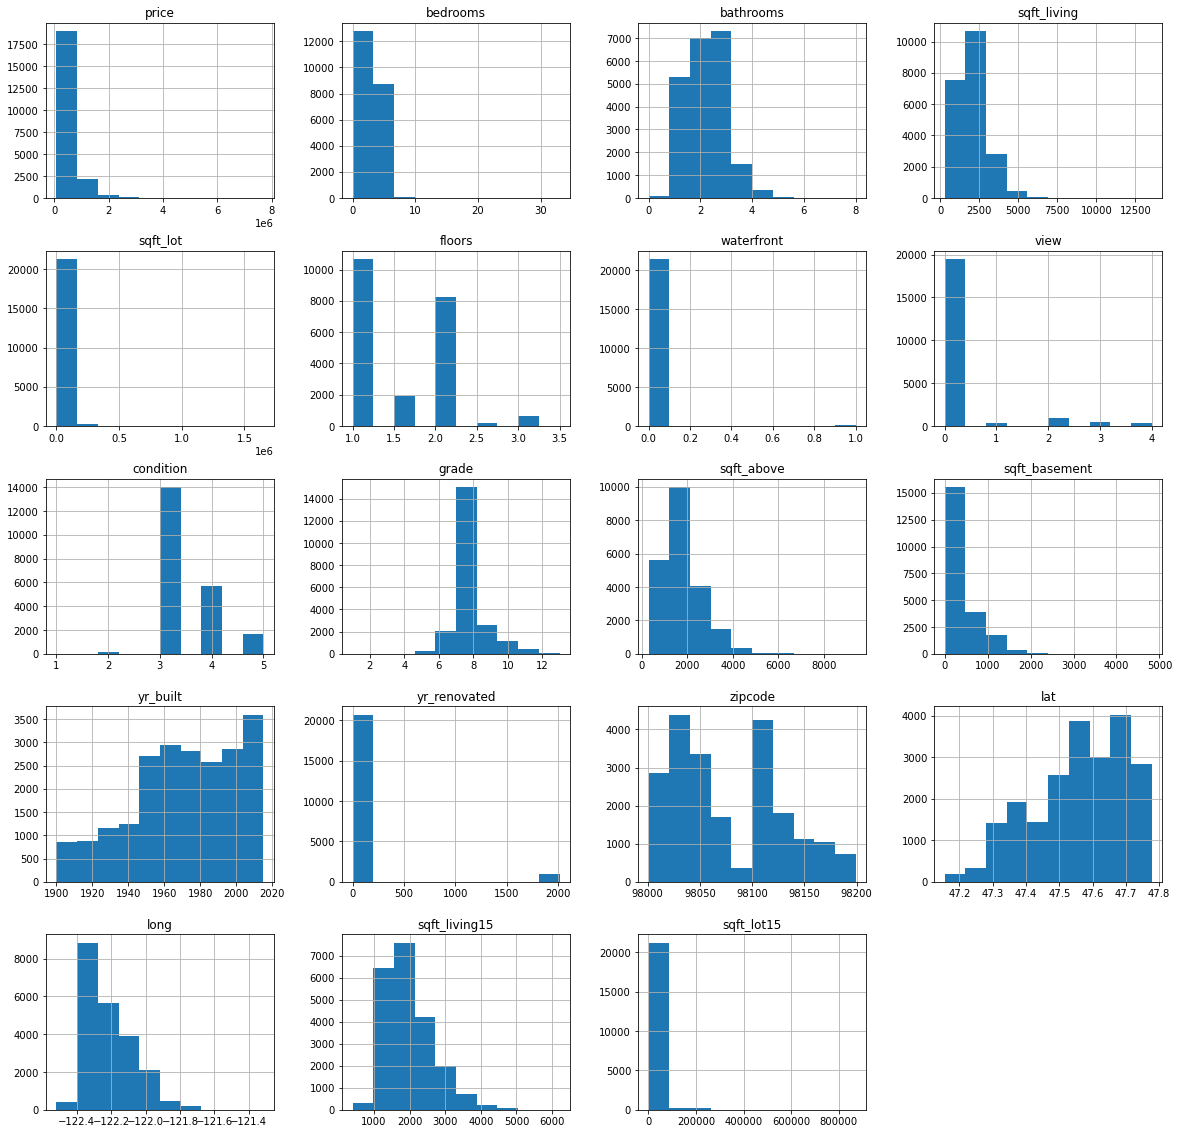

In [10]:
# Histogram of the each colounm 
df1.hist(figsize=(20, 20))

<AxesSubplot:xlabel='sqft_lot15'>

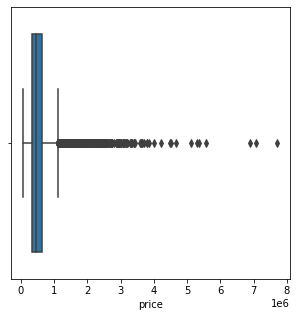

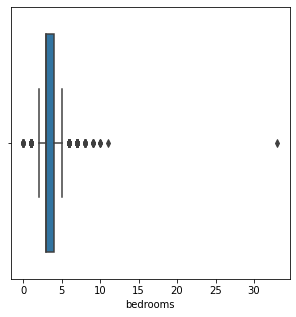

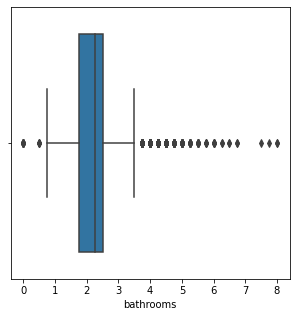

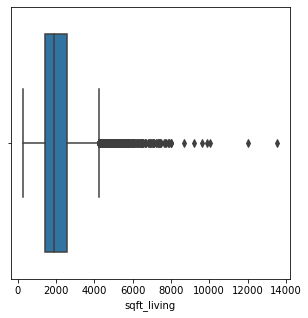

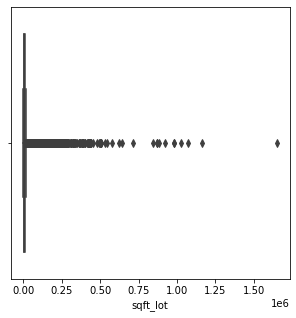

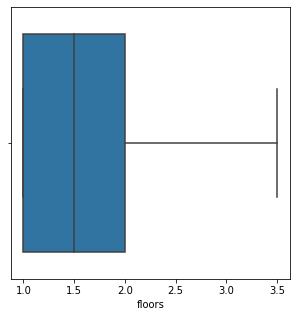

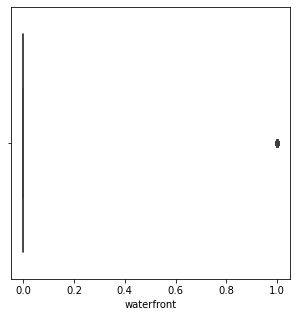

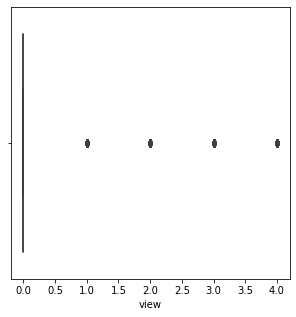

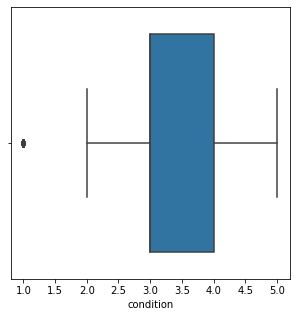

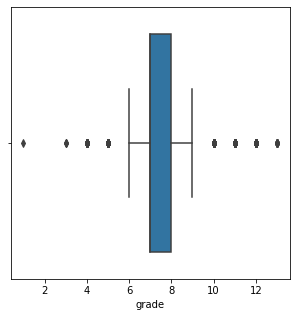

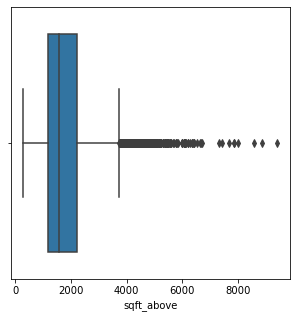

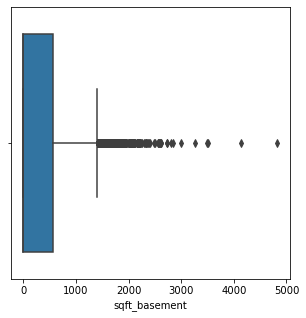

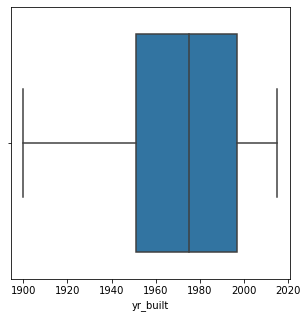

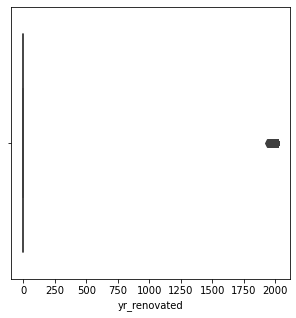

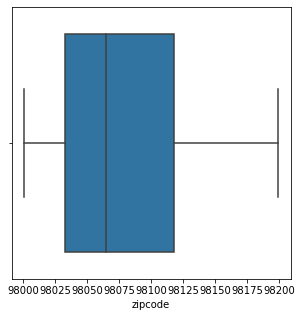

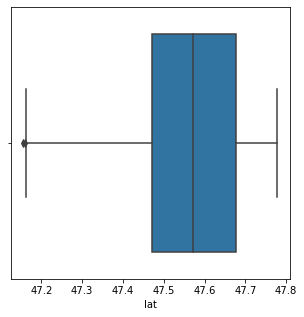

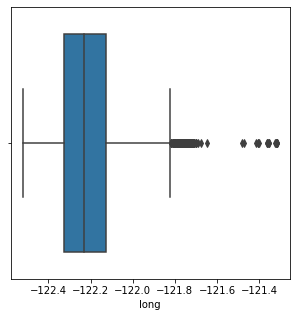

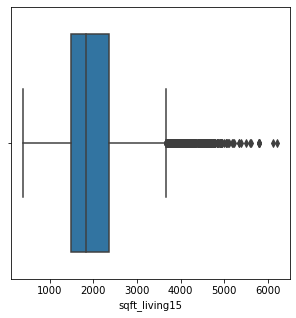

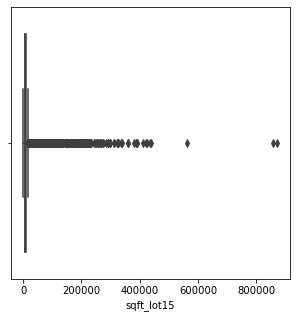

In [11]:

#price Boxplot 
plt.figure(figsize=(5, 5))
sns.boxplot(x=df1['price'])

#bedrooms Boxplot 
plt.figure(figsize=(5, 5))
sns.boxplot(x=df1['bedrooms'])

#bathrooms Boxplot 
plt.figure(figsize=(5, 5))
sns.boxplot(x=df1['bathrooms'])

#sqft_living Boxplot 
plt.figure(figsize=(5, 5))
sns.boxplot(x=df1['sqft_living'])

#sqft_lot Boxplot 
plt.figure(figsize=(5, 5))
sns.boxplot(x=df1['sqft_lot'])

#floors Boxplot 
plt.figure(figsize=(5, 5))
sns.boxplot(x=df1['floors'])

#waterfront Boxplot 
plt.figure(figsize=(5, 5))
sns.boxplot(x=df1['waterfront'])

#view Boxplot 
plt.figure(figsize=(5, 5))
sns.boxplot(x=df1['view'])

#condition Boxplot 
plt.figure(figsize=(5, 5))
sns.boxplot(x=df1['condition'])

#grade Boxplot 
plt.figure(figsize=(5, 5))
sns.boxplot(x=df1['grade'])

#sqft_above Boxplot 
plt.figure(figsize=(5, 5))
sns.boxplot(x=df1['sqft_above'])

#sqft_basement Boxplot 
plt.figure(figsize=(5, 5))
sns.boxplot(x=df1['sqft_basement'])

#yr_built Boxplot 
plt.figure(figsize=(5, 5))
sns.boxplot(x=df1['yr_built'])

#yr_renovated Boxplot 
plt.figure(figsize=(5, 5))
sns.boxplot(x=df1['yr_renovated'])

#zipcode Boxplot 
plt.figure(figsize=(5, 5))
sns.boxplot(x=df1['zipcode'])

#lat Boxplot 
plt.figure(figsize=(5, 5))
sns.boxplot(x=df1['lat'])

#long Boxplot 
plt.figure(figsize=(5, 5))
sns.boxplot(x=df1['long'])

#sqft_living15 Boxplot 
plt.figure(figsize=(5, 5))
sns.boxplot(x=df1['sqft_living15'])

#sqft_lot15 Boxplot 
plt.figure(figsize=(5, 5))
sns.boxplot(x=df1['sqft_lot15'])

In [12]:
df1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<h2 style='color:#205be6'>Data Cleaning</h2>

In [13]:
df2 = df1.drop([ 'zipcode', 'date', 'waterfront', 'view', 'yr_renovated'],
               axis='columns')
df2.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,47.7379,-122.233,2720,8062


In [14]:
# Fill missing values of 'floors' and 'yr_built' columns
df2['yr_built'] = df2['yr_built'].fillna(df2['yr_built'].median())
df2['floors'] = df2['floors'].fillna(df2['floors'].median())

df2.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,47.7379,-122.233,2720,8062


In [15]:
# See again how many null values in each column. But now we deal with 'df2'

df2.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<h2 style='color:#205be6'>Detect and Remove Outliers Using Inter Quartile Range (IQR)</h2>

In [16]:

# Remove outliers of all columns and assign to new data freame called 'df3'

cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 
        'yr_built']
Q1 = df1[cols].quantile(0.25)
Q3 = df1[cols].quantile(0.75)
IQR = Q3 - Q1

df3 = df2[~((df1[cols] < (Q1 - 1.5 * IQR)) | (df1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [17]:
df3

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,3,8,1530,0,2009,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,3,8,2310,0,2014,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,3,7,1020,0,2009,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,3,8,1600,0,2004,47.5345,-122.069,1410,1287


In [18]:
# See the houses there are floors more than 3, because it is uncommon and need to be removed from further processing


df4 = df3.copy()
df4 = df3[df3.floors < 3]

In [19]:
# See the houses there are more bathrooms than bedrooms count + 2, because it is uncommon and need to be removed from further processing

df4 = df3[df3.bathrooms < df3.bathrooms + 2]

In [20]:
df4.shape

(16823, 15)

In [21]:
df4.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

<h2 style='color:#205be6'>Data Standardization and Normalization</h2>

In [22]:
#Convert bathrooms,floors and price into integers.
df5 = df4.copy()


df5['bathrooms'] = df5['bathrooms'].astype('int64')
df5['floors'] = df5['floors'].astype('int64')
df5['price'] = df5['price'].astype('int64')

In [23]:
df5.dtypes

price              int64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors             int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [24]:
df6 = df5.copy()

df6['price'] = df5['price'] / df5['price'].max()
df6['bedrooms'] = df5['bedrooms'] / df5['bedrooms'].max()
df6['bathrooms'] = df5['bathrooms'] / df5['bathrooms'].max()
df6['sqft_living'] = df5['sqft_living'] / df5['sqft_living'].max()
df6['sqft_lot'] = df5['sqft_lot'] / df2['sqft_lot'].max()
df6['floors'] = df2['floors'] / df5['floors'].max()
df6['condition'] = df5['condition'] / df5['condition'].max()
df6['grade'] = df5['grade'] / df5['grade'].max()
df6['sqft_above'] = df5['sqft_above'] / df5['sqft_above'].max()
df6['sqft_basement'] = df5['sqft_basement'] / df5['sqft_basement'].max()
df6['yr_built'] = df5['yr_built'] / df5['yr_built'].max()
df6['lat'] = df5['lat'] / df5['lat'].max()
df6['long'] = df5['long'] / df5['long'].max()
df6['sqft_living15'] = df5['sqft_living15'] / df5['sqft_living15'].max()
df6['sqft_lot15'] = df5['sqft_lot15'] / df5['sqft_lot15'].max()


df6

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,0.198125,0.6,0.333333,0.279621,0.003421,0.333333,0.6,0.777778,0.315508,0.000000,0.970223,0.994424,1.007732,0.270707,0.028740
1,0.480357,0.6,0.666667,0.609005,0.004385,0.666667,0.6,0.777778,0.580214,0.285714,0.968238,0.998815,1.008243,0.341414,0.038857
2,0.160714,0.4,0.333333,0.182464,0.006056,0.333333,0.6,0.666667,0.205882,0.000000,0.959305,0.999169,1.007534,0.549495,0.041009
3,0.539286,0.8,1.000000,0.464455,0.003028,0.333333,1.0,0.777778,0.280749,0.650000,0.975186,0.994625,1.008853,0.274747,0.025434
4,0.455357,0.6,0.666667,0.398104,0.004893,0.333333,0.6,0.888889,0.449198,0.000000,0.986104,0.996634,1.005984,0.363636,0.038166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.321429,0.6,0.666667,0.362559,0.000685,1.000000,0.6,0.888889,0.409091,0.000000,0.997022,0.998361,1.008465,0.309091,0.007676
21609,0.357143,0.8,0.666667,0.547393,0.003520,0.666667,0.6,0.888889,0.617647,0.000000,0.999504,0.994414,1.008597,0.369697,0.036624
21610,0.359019,0.4,0.000000,0.241706,0.000818,0.666667,0.6,0.777778,0.272727,0.000000,0.997022,0.996166,1.008078,0.206061,0.010209
21611,0.357143,0.6,0.666667,0.379147,0.001446,0.666667,0.6,0.888889,0.427807,0.000000,0.994541,0.994912,1.006182,0.284848,0.006547


<h2 style='color:#205be6'>Split Train data and Test data</h2>

In [25]:
y = df6['price']
X = df6.drop('price', axis=1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1)

In [27]:
# MLP Regression

MLPRegressionModel = MLPRegressor()
MLPRegressionModel.fit(X_train, y_train)

MLPRegressor()

<h2 style='color:#205be6'>Test the Models - R squared score</h2>

In [28]:
# For MLP Regression

MLPRegressionModel.score(X_test, y_test)

0.504156894401082

In [29]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(MLPRegressor(), X, y, cv=cv)

array([0.46001543, 0.4577541 , 0.51344853, 0.42442209, 0.4615533 ])

In [30]:
def DistributionPlot(RedFunction, BlueFunction):
    plt.figure(figsize=(10, 10))

    ax1 = sns.distplot(RedFunction, hist=False, color="r")
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", ax=ax1)

    plt.show()
    plt.close()

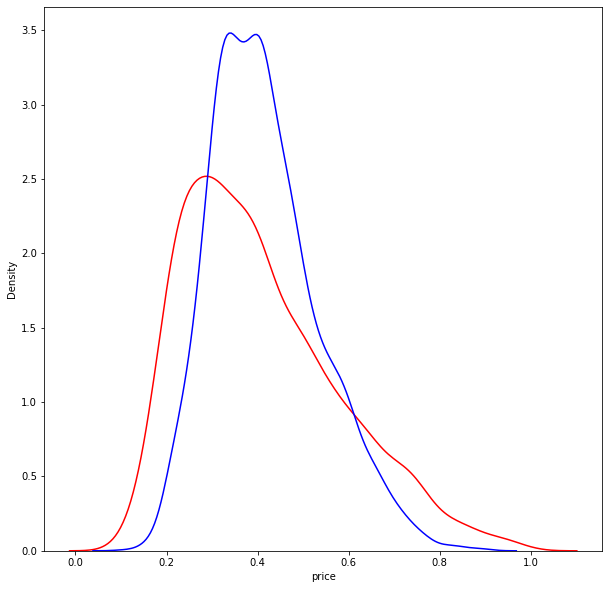

In [31]:
# For MLP Regression

# get predicted y values for X_Test values and store in 'yhat_test' variable

yhat_test_MLP = MLPRegressionModel.predict(X_test)

# Draw the graphs
DistributionPlot(y_test,yhat_test_MLP)


<h2 style='color:#205be6'>LOG Transformation</h2>

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

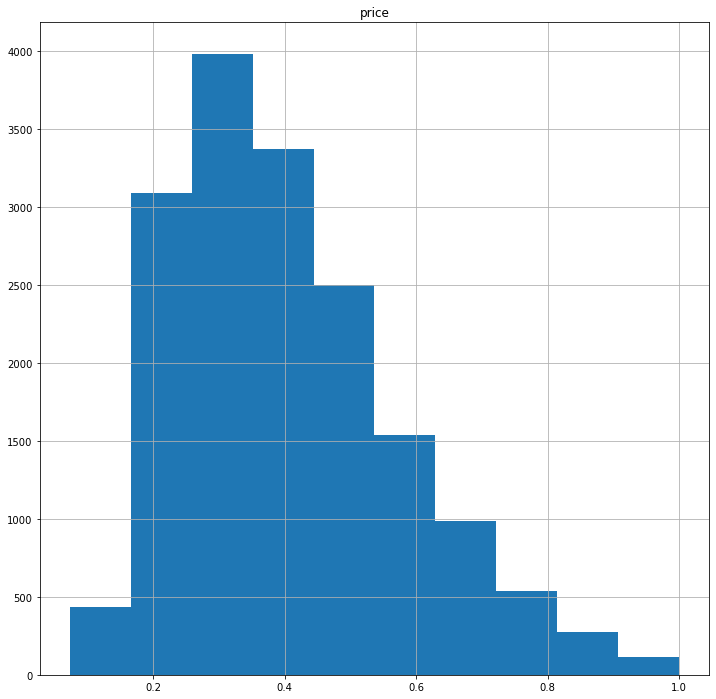

In [32]:
df6.hist(column='price')

In [33]:
df6['logged_prcie'] =np.log(df6.price)
df6.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,logged_prcie
0,0.198125,0.6,0.333333,0.279621,0.003421,0.333333,0.6,0.777778,0.315508,0.000000,0.970223,0.994424,1.007732,0.270707,0.028740,-1.618857
1,0.480357,0.6,0.666667,0.609005,0.004385,0.666667,0.6,0.777778,0.580214,0.285714,0.968238,0.998815,1.008243,0.341414,0.038857,-0.733225
2,0.160714,0.4,0.333333,0.182464,0.006056,0.333333,0.6,0.666667,0.205882,0.000000,0.959305,0.999169,1.007534,0.549495,0.041009,-1.828127
3,0.539286,0.8,1.000000,0.464455,0.003028,0.333333,1.0,0.777778,0.280749,0.650000,0.975186,0.994625,1.008853,0.274747,0.025434,-0.617510
4,0.455357,0.6,0.666667,0.398104,0.004893,0.333333,0.6,0.888889,0.449198,0.000000,0.986104,0.996634,1.005984,0.363636,0.038166,-0.786673


array([[<AxesSubplot:title={'center':'logged_prcie'}>]], dtype=object)

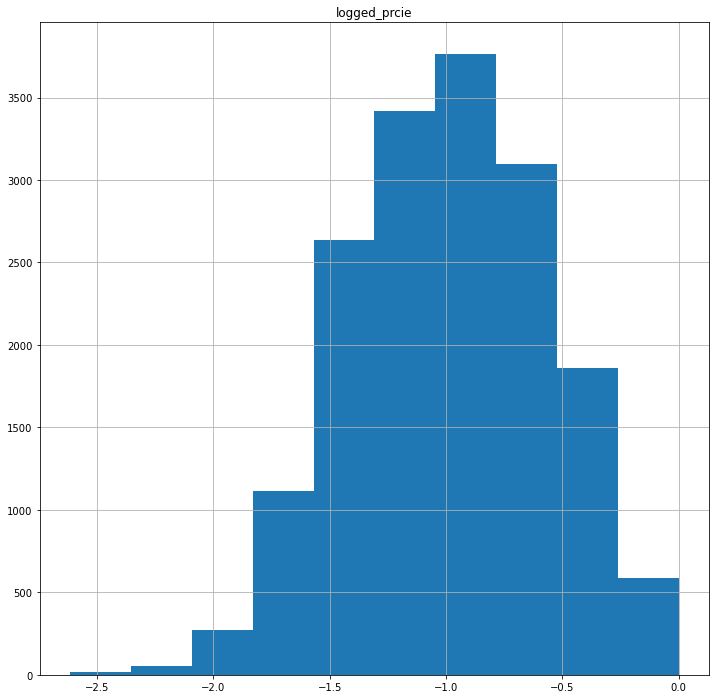

In [34]:
df6.hist(column='logged_prcie')

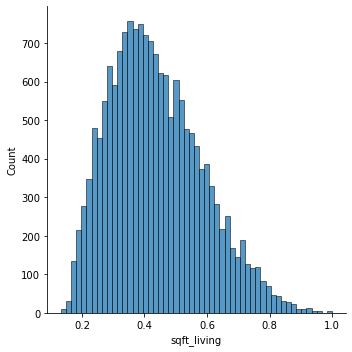

In [35]:
sns.displot(df6['sqft_living'])

In [36]:
df6['logged_sqft_living'] =np.log(df6.sqft_living)
df6.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,logged_prcie,logged_sqft_living
0,0.198125,0.6,0.333333,0.279621,0.003421,0.333333,0.6,0.777778,0.315508,0.000000,0.970223,0.994424,1.007732,0.270707,0.028740,-1.618857,-1.274321
1,0.480357,0.6,0.666667,0.609005,0.004385,0.666667,0.6,0.777778,0.580214,0.285714,0.968238,0.998815,1.008243,0.341414,0.038857,-0.733225,-0.495929
2,0.160714,0.4,0.333333,0.182464,0.006056,0.333333,0.6,0.666667,0.205882,0.000000,0.959305,0.999169,1.007534,0.549495,0.041009,-1.828127,-1.701200
3,0.539286,0.8,1.000000,0.464455,0.003028,0.333333,1.0,0.777778,0.280749,0.650000,0.975186,0.994625,1.008853,0.274747,0.025434,-0.617510,-0.766891
4,0.455357,0.6,0.666667,0.398104,0.004893,0.333333,0.6,0.888889,0.449198,0.000000,0.986104,0.996634,1.005984,0.363636,0.038166,-0.786673,-0.921041


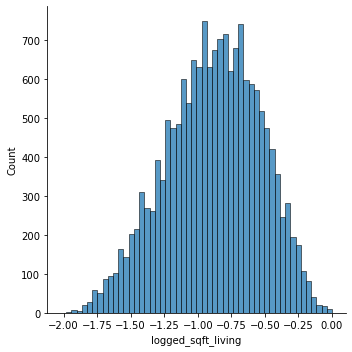

In [37]:
sns.displot(df6['logged_sqft_living'])

<h2 style='color:#205be6'>Train dataset New data set after log Transformation</h2>

In [38]:
y = df6['price']
X = df6.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1)

In [39]:
# MLP Regression

MLPRegressionModel = MLPRegressor()
MLPRegressionModel.fit(X_train, y_train)

MLPRegressor()

In [40]:
# For MLP Regression

MLPRegressionModel.score(X_test, y_test)

0.9977114221914203

In [41]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(MLPRegressor(), X, y, cv=cv)

array([0.99877787, 0.99782147, 0.99824817, 0.99819872, 0.9982088 ])

In [42]:
def DistributionPlot(RedFunction, BlueFunction):
    plt.figure(figsize=(10, 10))

    ax1 = sns.distplot(RedFunction, hist=False, color="r")
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", ax=ax1)

    plt.show()
    plt.close()

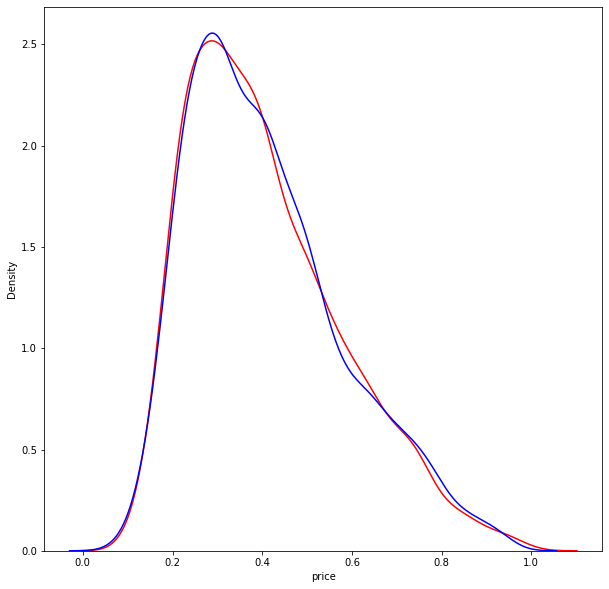

In [43]:
# For MLP Regression

# get predicted y values for X_Test values and store in 'yhat_test' variable

yhat_test_MLP = MLPRegressionModel.predict(X_test)

# Draw the graphs
DistributionPlot(y_test,yhat_test_MLP)